In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import torch.nn as nn
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from tabulate import tabulate
from IPython.display import clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data



import sys
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Experimental_setup")
from Experiment_v5 import Experiment
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Training")
from Training_Networks import Training
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Analysis")
from Check import Checkup



sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Experiments/Analysis")
from Manifold_Analysis import Manifold_analysis



from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances

from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from functools import partial
from sklearn import manifold, datasets

In [2]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

SEED = 2021
set_seed(seed=SEED)
# if gpu is to be used
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Device: ", device)

G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)

Device:  cpu
Random seed 2021 has been set.


# Generate the Dataset

In [3]:
WIDTH = 100
BATCH_SIZE = 32
Names_hook = ["fc1","fc2","fc3"]
set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=BATCH_SIZE,size_output_multi = 2)


dataset_train,dataset_space_train,dataset_weather_train,dataset_val,dataset_space_val,dataset_weather_val,dataset_test,dataset_space_test,dataset_weather_test= experiment.Generate_data()
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_multi = torch.utils.data.DataLoader(dataset_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Random seed 2021 has been set.
Test size dataset space torch.Size([999, 6])
Test size dataset weather torch.Size([999, 6])
Train size dataset space torch.Size([7000, 6])
Train size dataset weather torch.Size([7000, 6])


In [4]:
do_analysis  = True

# Multi

## Parameters Network

In [5]:
Input_Dimension = 6
Nodes_Second = 20
Nodes_Third =10
Output_Dimension = 2

## Train network and visualize representation every N epochs

Epoch 190, val_loss 0.019008517265319824


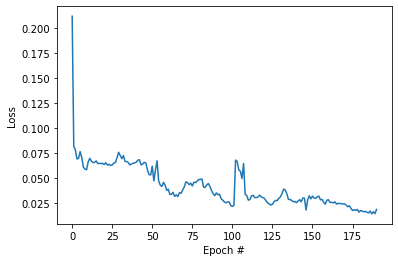

In [7]:
ITERATION = 50
EPOCH = 200
frequence = 10
Multi_losses = []
representation_analysis = True
type_analyse = 0
List_cka_init = [[] for iteration in range(ITERATION)]
for iteration in range(ITERATION):
    training = Training()
    model,val_losses = training.training_multi(Input_Dimension,Nodes_Second,Nodes_Third,Output_Dimension,EPOCH,train_loader,val_loader,test_loader_multi,do_analysis,type_analyse,frequence)
    Multi_losses.append(val_losses)
    List_cka_init[iteration].append(training.Liste_cka_init)
    
                

In [27]:
Mean_Liste_cka_fc1 = torch.tensor(List_cka_init[0][0][0])

for iteration in range(ITERATION):
    Mean_Liste_cka_fc1 = torch.add(Mean_Liste_cka_fc1,torch.tensor(List_cka_init[iteration][0][0])) 

Mean_Liste_cka_fc1 = Mean_Liste_cka_fc1/50

In [28]:
Mean_Liste_cka_fc2 = torch.tensor(List_cka_init[0][0][1])

for iteration in range(ITERATION):
    Mean_Liste_cka_fc2 = torch.add(Mean_Liste_cka_fc2,torch.tensor(List_cka_init[iteration][0][1])) 

Mean_Liste_cka_fc2 = Mean_Liste_cka_fc2/50

In [29]:
Mean_Liste_cka_fc3 = torch.tensor(List_cka_init[0][0][2])

for iteration in range(ITERATION):
    Mean_Liste_cka_fc3 = torch.add(Mean_Liste_cka_fc3,torch.tensor(List_cka_init[iteration][0][2])) 

Mean_Liste_cka_fc3 = Mean_Liste_cka_fc3/50

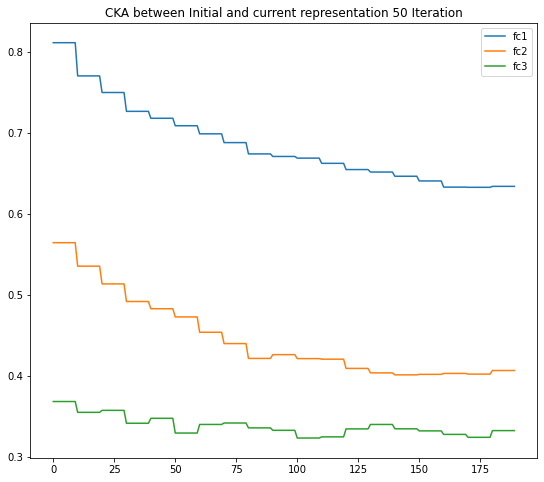

In [31]:
epochs_cka = [i for i in range(len(Mean_Liste_cka_fc1))]

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(epochs_cka,Mean_Liste_cka_fc1 ,label = Names_hook[0])
plt.plot(epochs_cka,Mean_Liste_cka_fc2 ,label = Names_hook[1])
plt.plot(epochs_cka,Mean_Liste_cka_fc3 ,label = Names_hook[2])
plt.title("CKA between Initial and current representation 50 Iteration")


plt.legend()

## WEATHER

In [5]:
train_loader = torch.utils.data.DataLoader(dataset_weather_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_weather_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_weather = torch.utils.data.DataLoader(dataset_weather_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

In [6]:
Nodes_Second = 20
Nodes_Third = 5
Output_Dimension = 2

Epoch 190, val_loss 0.02475821782672216


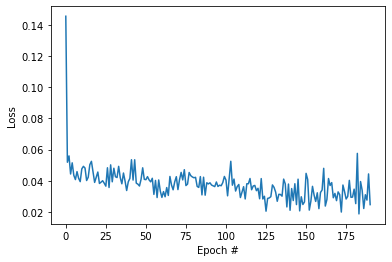

CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis


In [7]:
EPOCH = 200
Weather_losses = []
type_analyse = 0

training = Training()
model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader,val_loader,test_loader_weather,do_analysis,type_analyse,"Weather")
Weather_losses.append(val_losses)

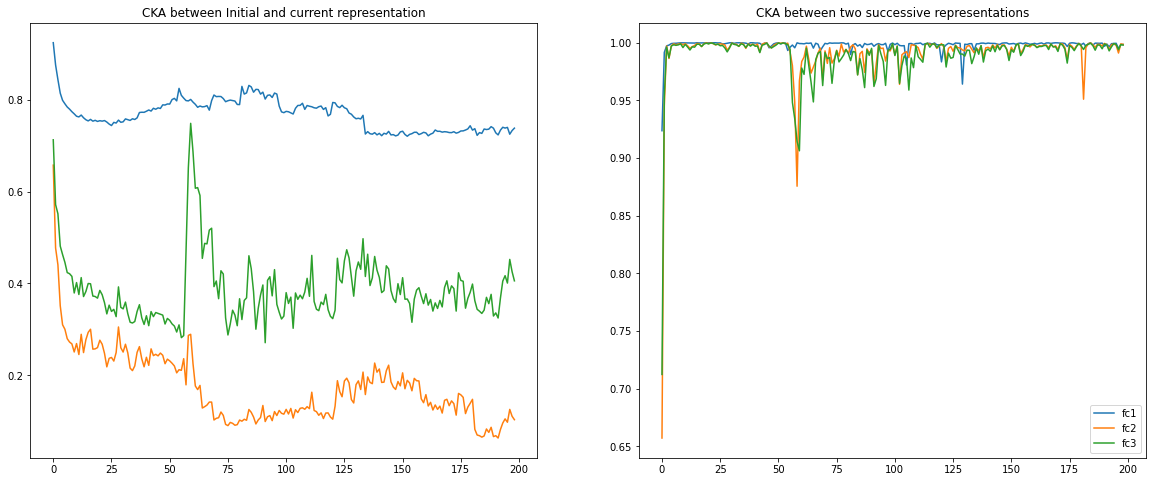

In [9]:
epochs_cka = [i for i in range(len(training.Liste_cka_init[0]))]

plt.figure(figsize = (20,8))
for layer in range(len(Names_hook)):
    plt.subplot(1,2,1)
    plt.plot(epochs_cka,training.Liste_cka_init[layer],label = Names_hook[layer])
    plt.title("CKA between Initial and current representation")
    plt.subplot(1,2,2)
    plt.title("CKA between two successive representations")
    plt.plot(epochs_cka,training.Liste_cka[layer],label = Names_hook[layer])

plt.legend()

In [12]:
## SPATIAL

In [10]:
train_loader = torch.utils.data.DataLoader(dataset_space_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_space_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_space = torch.utils.data.DataLoader(dataset_space_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Epoch 190, val_loss 0.029231733745998807


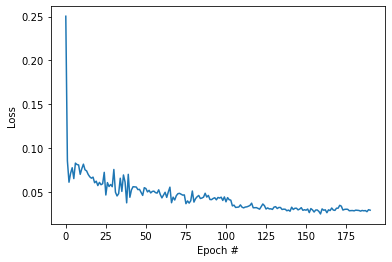

CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis
CKA analysis


In [12]:
EPOCH = 200
Spatial_losses = []
training = Training()
model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader,val_loader,test_loader_space,do_analysis,type_analyse,"Spatial")
Spatial_losses.append(val_losses)

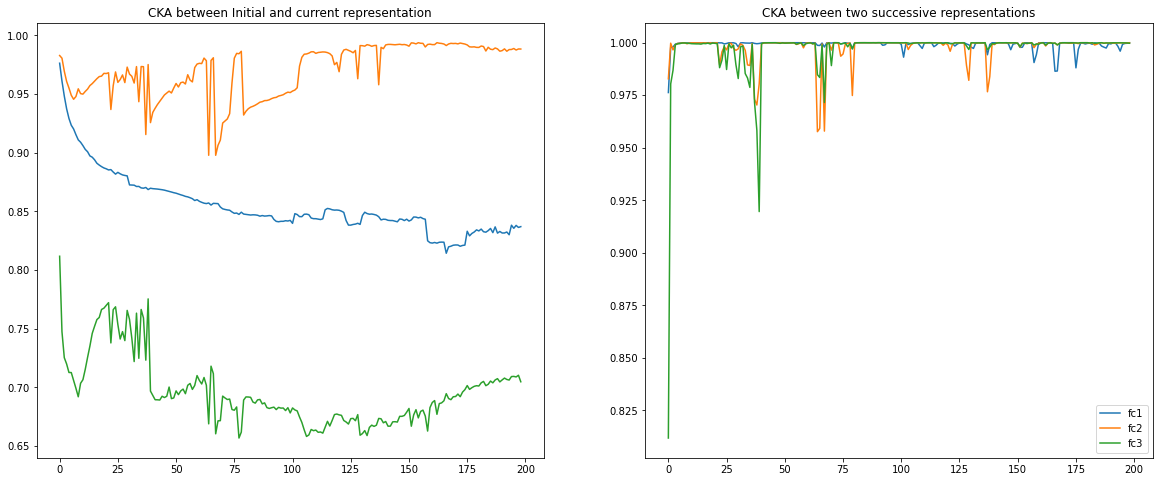

In [13]:
epochs_cka = [i for i in range(len(training.Liste_cka_init[0]))]

plt.figure(figsize = (20,8))
for layer in range(len(Names_hook)):
    plt.subplot(1,2,1)
    plt.plot(epochs_cka,training.Liste_cka_init[layer],label = Names_hook[layer])
    plt.title("CKA between Initial and current representation")
    plt.subplot(1,2,2)
    plt.title("CKA between two successive representations")
    plt.plot(epochs_cka,training.Liste_cka[layer],label = Names_hook[layer])

plt.legend()